In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aghahanzalah","key":"c9ac80aa40fa6c78bf324500a6d1a8e5"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d tinashri/brain-tumor-dataset-includes-the-mask-and-images


 97% 302M/312M [00:05<00:00, 80.5MB/s]
100% 312M/312M [00:05<00:00, 58.7MB/s]


In [ ]:
!unzip brain-tumor-dataset-includes-the-mask-and-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/data/images/2014.png  
  inflating: data/data/images/2015.png  
  inflating: data/data/images/2016.png  
  inflating: data/data/images/2017.png  
  inflating: data/data/images/2018.png  
  inflating: data/data/images/2019.png  
  inflating: data/data/images/202.png  
  inflating: data/data/images/2020.png  
  inflating: data/data/images/2021.png  
  inflating: data/data/images/2022.png  
  inflating: data/data/images/2023.png  
  inflating: data/data/images/2024.png  
  inflating: data/data/images/2025.png  
  inflating: data/data/images/2026.png  
  inflating: data/data/images/2027.png  
  inflating: data/data/images/2028.png  
  inflating: data/data/images/2029.png  
  inflating: data/data/images/203.png  
  inflating: data/data/images/2030.png  
  inflating: data/data/images/2031.png  
  inflating: data/data/images/2032.png  
  inflating: data/data/images/2033.png  
  inflating: data/data/images/2034.png  
  inflat

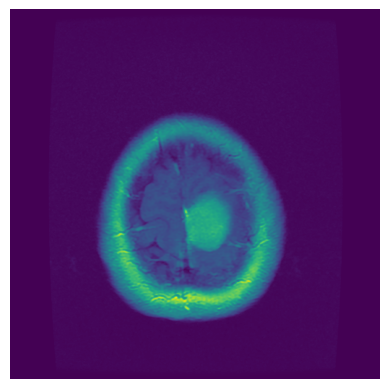

In [ ]:
import os
import matplotlib.pyplot as plt

dataset_dir = "/content/data/data/images/"

image_path = os.path.join(dataset_dir, "15.png")
image = plt.imread(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
NUM_CLASSES = 1

def preprocess_image(image_path, image_dir, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH)):
    img_path = os.path.join(image_dir, image_path)
    img = load_img(img_path, target_size=target_size, color_mode='grayscale')
    img_array = img_to_array(img) / 255.0
    return img_array

def load_data(image_paths, mask_paths, image_dir, mask_dir):
    images = [preprocess_image(img_path, image_dir) for img_path in image_paths]
    masks = [preprocess_image(mask_path, mask_dir) for mask_path in mask_paths]
    return np.array(images), np.array(masks)

def unet_model(input_shape):
    inputs = Input(shape=input_shape)

    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(drop5)
    up6 = concatenate([up6, drop4], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same')(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same')(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same')(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same')(conv9)

    outputs = Conv2D(NUM_CLASSES, 1, activation='sigmoid')(conv9)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model


current_dir = os.getcwd()
image_dir = os.path.join(current_dir, "data/data/images")
mask_dir = os.path.join(current_dir, "data/data/masks")

image_paths = os.listdir(image_dir)
mask_paths = os.listdir(mask_dir)

images, masks = load_data(image_paths, mask_paths, image_dir, mask_dir)

print("Images shape:", images.shape)
print("Masks shape:", masks.shape)

Images shape: (3064, 128, 128, 1)
Masks shape: (3064, 128, 128, 1)


In [ ]:
model = unet_model(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_95 (Conv2D)          (None, 128, 128, 64)         640       ['input_6[0][0]']             
                                                                                                  
 conv2d_96 (Conv2D)          (None, 128, 128, 64)         36928     ['conv2d_95[0][0]']           
                                                                                                  
 max_pooling2d_20 (MaxPooli  (None, 64, 64, 64)           0         ['conv2d_96[0][0]']           
 ng2D)                                                                                      

Epoch 1/15
 6/77 [=>............................] - ETA: 29s - loss: 0.0687 - accuracy: 0.9831

77/77 [==============================] - ETA: 0s - loss: 0.0688 - accuracy: 0.9829
Epoch 1: val_loss did not improve from 0.04235
1/1 [==============================] - 0s 18ms/step


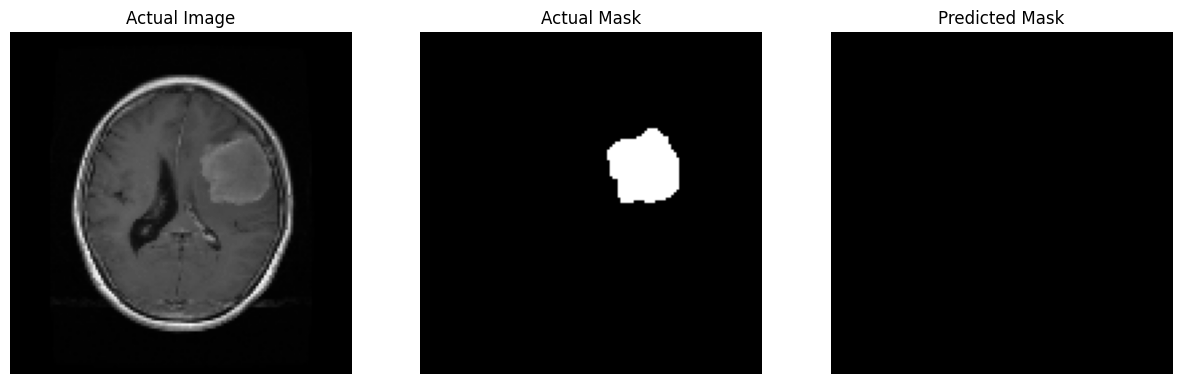

77/77 [==============================] - 36s 465ms/step - loss: 0.0688 - accuracy: 0.9829 - val_loss: 0.0615 - val_accuracy: 0.9841
Epoch 2/15
77/77 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9829
Epoch 2: val_loss did not improve from 0.04235
1/1 [==============================] - 0s 19ms/step


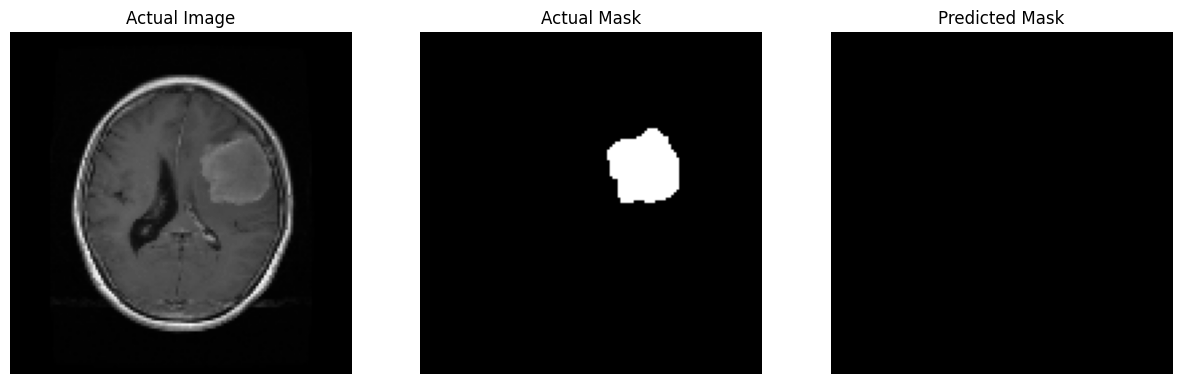

77/77 [==============================] - 36s 463ms/step - loss: 0.0633 - accuracy: 0.9829 - val_loss: 0.0583 - val_accuracy: 0.9841
Epoch 3/15
77/77 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.9829
Epoch 3: val_loss did not improve from 0.04235
1/1 [==============================] - 0s 29ms/step


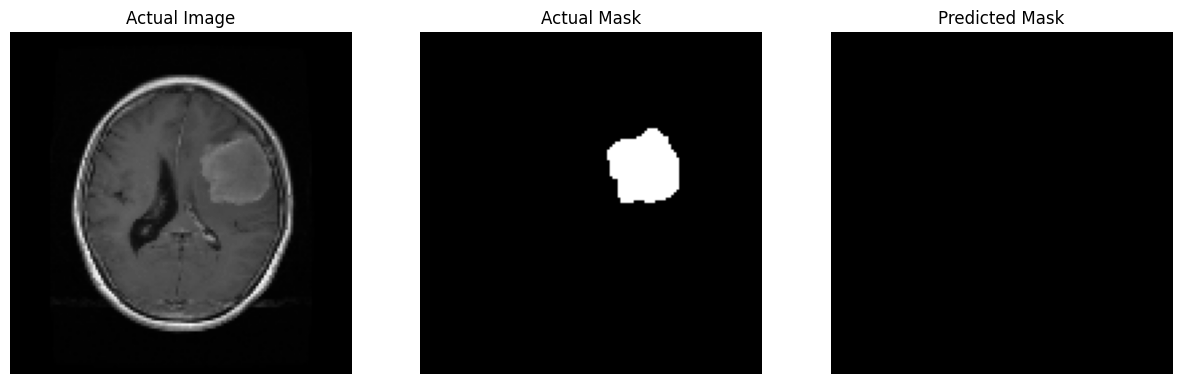

77/77 [==============================] - 36s 463ms/step - loss: 0.0622 - accuracy: 0.9829 - val_loss: 0.0603 - val_accuracy: 0.9841
Epoch 4/15
77/77 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9837
Epoch 4: val_loss did not improve from 0.04235
1/1 [==============================] - 0s 71ms/step


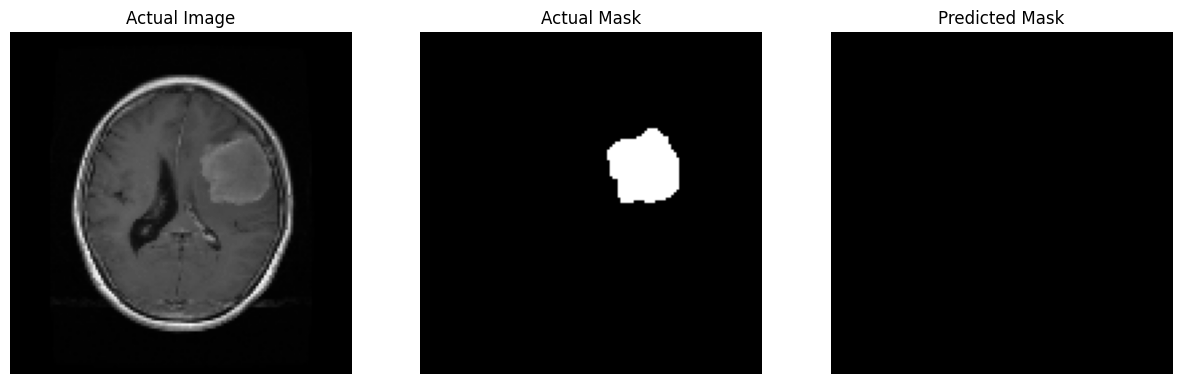

77/77 [==============================] - 36s 473ms/step - loss: 0.0579 - accuracy: 0.9837 - val_loss: 0.0528 - val_accuracy: 0.9850
Epoch 5/15
77/77 [==============================] - ETA: 0s - loss: 0.0520 - accuracy: 0.9848
Epoch 5: val_loss did not improve from 0.04235
1/1 [==============================] - 0s 18ms/step


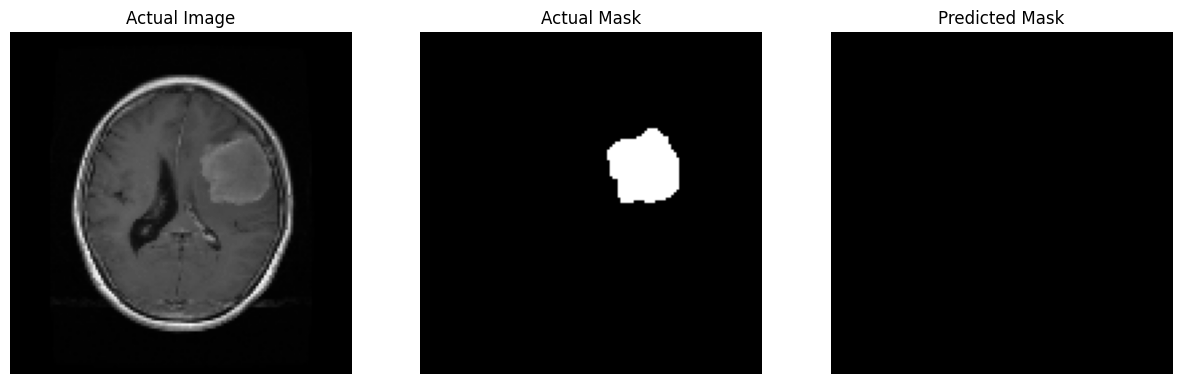

77/77 [==============================] - 35s 461ms/step - loss: 0.0520 - accuracy: 0.9848 - val_loss: 0.0468 - val_accuracy: 0.9860
Epoch 6/15
77/77 [==============================] - ETA: 0s - loss: 0.0479 - accuracy: 0.9856
Epoch 6: val_loss did not improve from 0.04235
1/1 [==============================] - 0s 18ms/step


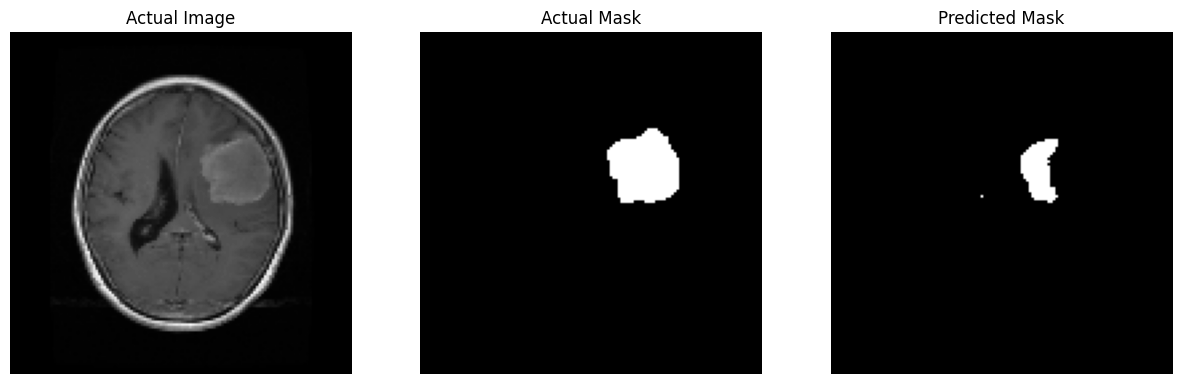

77/77 [==============================] - 36s 465ms/step - loss: 0.0479 - accuracy: 0.9856 - val_loss: 0.0429 - val_accuracy: 0.9871
Epoch 7/15
77/77 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9862
Epoch 7: val_loss improved from 0.04235 to 0.03929, saving model to model_weights.h5
1/1 [==============================] - 0s 18ms/step


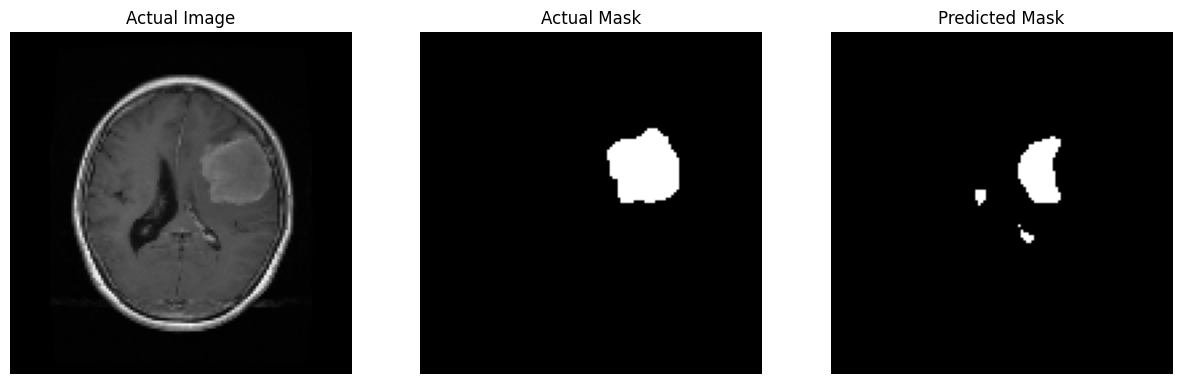

77/77 [==============================] - 41s 538ms/step - loss: 0.0439 - accuracy: 0.9862 - val_loss: 0.0393 - val_accuracy: 0.9873
Epoch 8/15
77/77 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.9868
Epoch 8: val_loss improved from 0.03929 to 0.03750, saving model to model_weights.h5
1/1 [==============================] - 0s 20ms/step


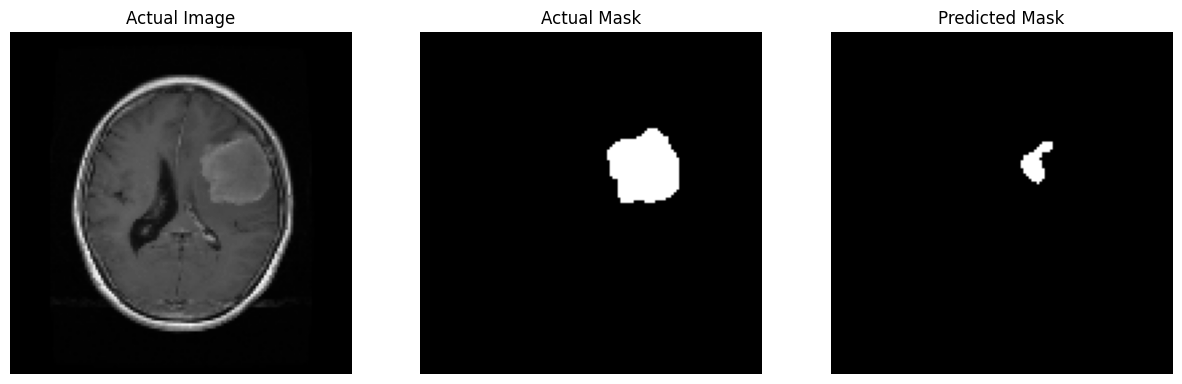

77/77 [==============================] - 37s 480ms/step - loss: 0.0406 - accuracy: 0.9868 - val_loss: 0.0375 - val_accuracy: 0.9872
Epoch 9/15
77/77 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9875
Epoch 9: val_loss improved from 0.03750 to 0.03645, saving model to model_weights.h5
1/1 [==============================] - 0s 19ms/step


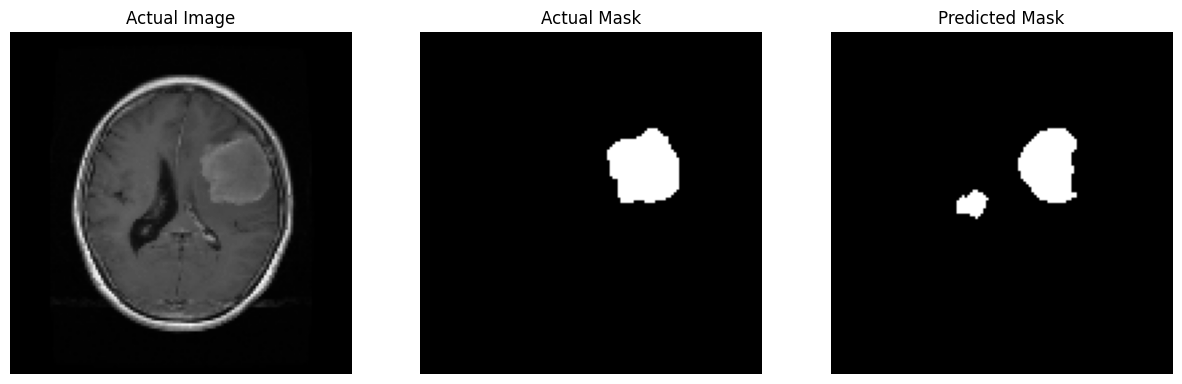

77/77 [==============================] - 37s 486ms/step - loss: 0.0373 - accuracy: 0.9875 - val_loss: 0.0364 - val_accuracy: 0.9884
Epoch 10/15
77/77 [==============================] - ETA: 0s - loss: 0.0386 - accuracy: 0.9876
Epoch 10: val_loss improved from 0.03645 to 0.03211, saving model to model_weights.h5
1/1 [==============================] - 0s 22ms/step


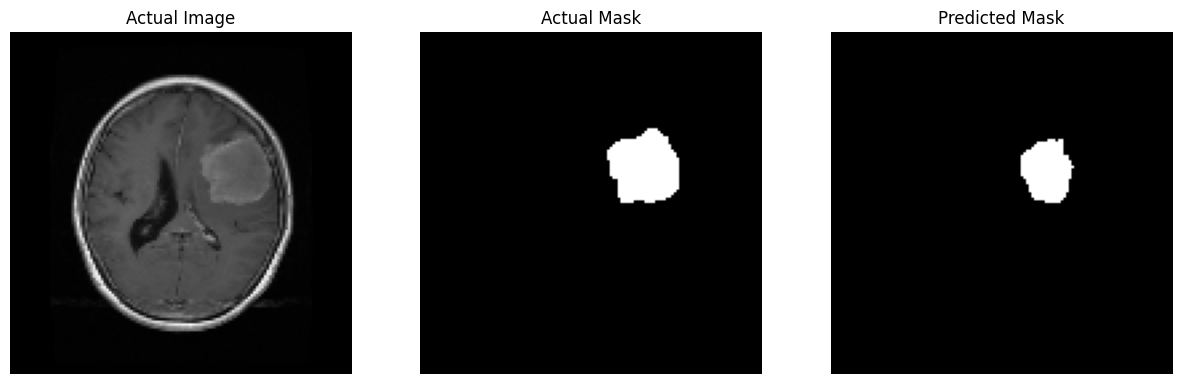

77/77 [==============================] - 84s 1s/step - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.0321 - val_accuracy: 0.9892
Epoch 11/15
77/77 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9885
Epoch 11: val_loss improved from 0.03211 to 0.03090, saving model to model_weights.h5
1/1 [==============================] - 0s 20ms/step


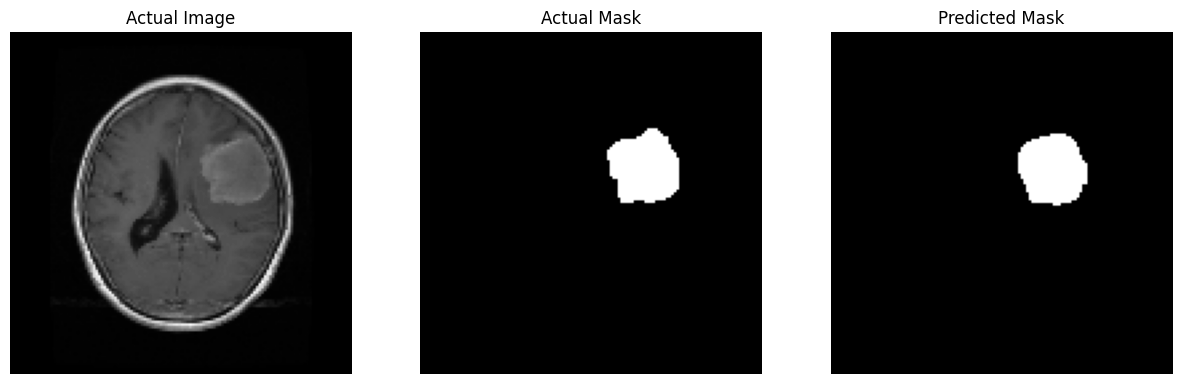

77/77 [==============================] - 39s 504ms/step - loss: 0.0336 - accuracy: 0.9885 - val_loss: 0.0309 - val_accuracy: 0.9896
Epoch 12/15
77/77 [==============================] - ETA: 0s - loss: 0.0325 - accuracy: 0.9889
Epoch 12: val_loss improved from 0.03090 to 0.02960, saving model to model_weights.h5
1/1 [==============================] - 0s 20ms/step


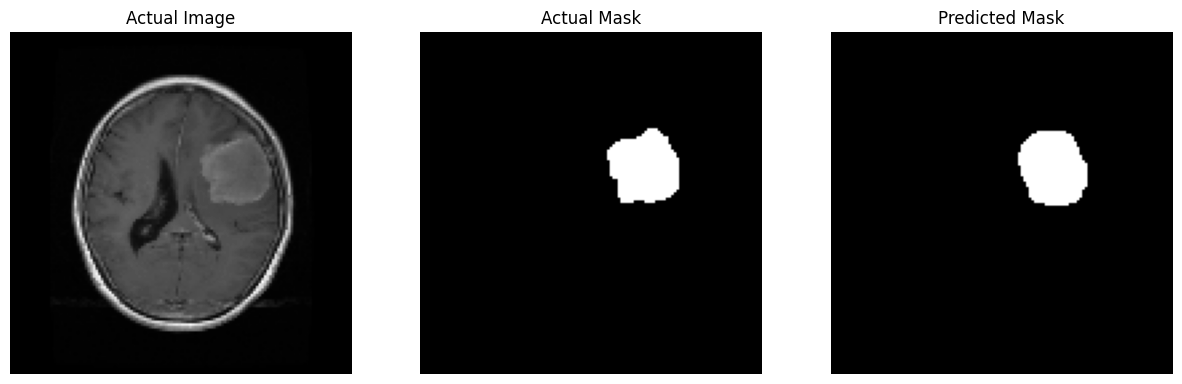

77/77 [==============================] - 36s 474ms/step - loss: 0.0325 - accuracy: 0.9889 - val_loss: 0.0296 - val_accuracy: 0.9899
Epoch 13/15
77/77 [==============================] - ETA: 0s - loss: 0.0287 - accuracy: 0.9898
Epoch 13: val_loss improved from 0.02960 to 0.02648, saving model to model_weights.h5
1/1 [==============================] - 0s 20ms/step


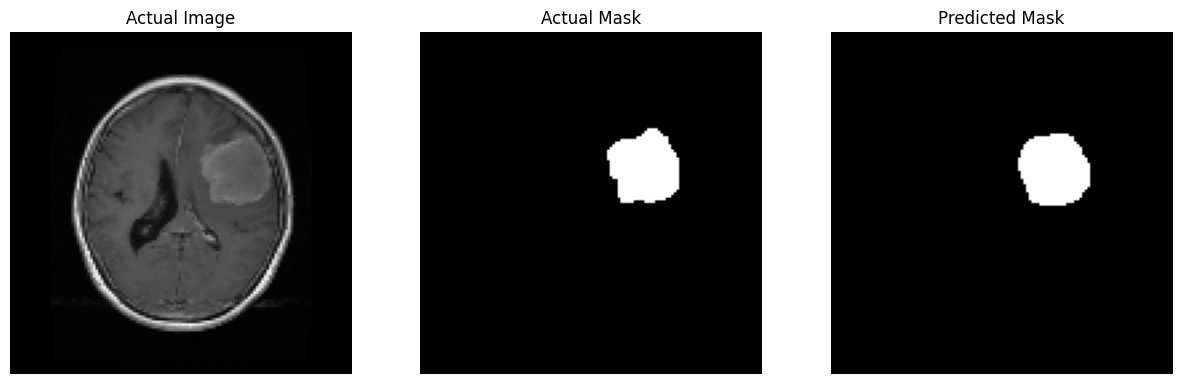

77/77 [==============================] - 36s 473ms/step - loss: 0.0287 - accuracy: 0.9898 - val_loss: 0.0265 - val_accuracy: 0.9906
Epoch 14/15
77/77 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9907
Epoch 14: val_loss improved from 0.02648 to 0.02487, saving model to model_weights.h5
1/1 [==============================] - 0s 20ms/step


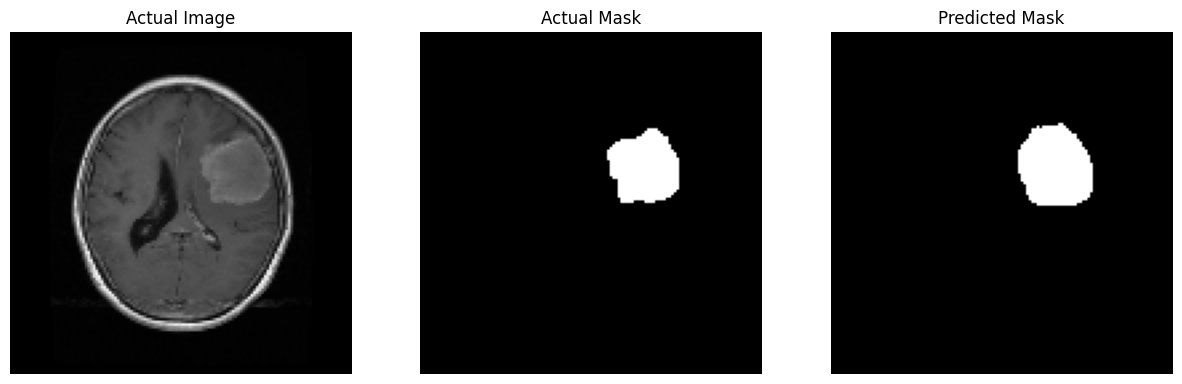

77/77 [==============================] - 36s 473ms/step - loss: 0.0254 - accuracy: 0.9907 - val_loss: 0.0249 - val_accuracy: 0.9912
Epoch 15/15
77/77 [==============================] - ETA: 0s - loss: 0.0248 - accuracy: 0.9909
Epoch 15: val_loss did not improve from 0.02487
1/1 [==============================] - 0s 19ms/step


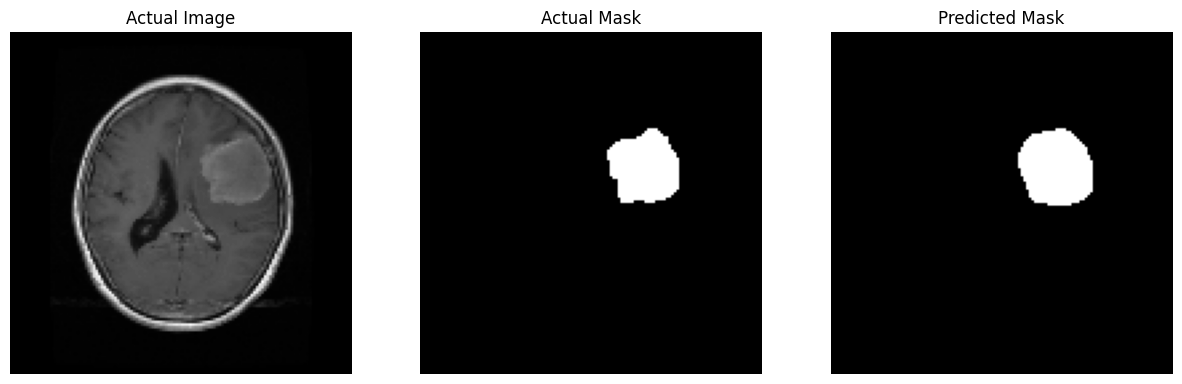

77/77 [==============================] - 35s 457ms/step - loss: 0.0248 - accuracy: 0.9909 - val_loss: 0.0256 - val_accuracy: 0.9910


In [ ]:
from tensorflow.keras.callbacks import Callback
import random

class ImagePredictionCallback(Callback):
    def __init__(self, images, masks, model):
        super(ImagePredictionCallback, self).__init__()
        self.images = images
        self.masks = masks
        self.model = model

    def on_epoch_end(self, epoch, logs=None):
        index = 5
        sample_image = self.images[index]
        sample_mask = self.masks[index]

        predicted_mask = self.model.predict(sample_image.reshape(1, IMAGE_HEIGHT, IMAGE_WIDTH, 1))[0]

        threshold = 0.3
        predicted_mask = (predicted_mask > threshold).astype(np.uint8) * 255

        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(sample_image.squeeze(), cmap='gray')
        plt.title('Actual Image')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(sample_mask.squeeze(), cmap='gray')
        plt.title('Actual Mask')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(predicted_mask.squeeze(), cmap='gray')
        plt.title('Predicted Mask')
        plt.axis('off')

        plt.show()

image_prediction_callback = ImagePredictionCallback(images, masks, model)

history = model.fit(
    x=images,
    y=masks,
    batch_size=32,
    epochs=15,
    validation_split=0.2,
    callbacks=[checkpoint_callback, image_prediction_callback]
)


In [ ]:
model.save("ns_highlighting_model.h5")

1/1 [==============================] - 0s 226ms/step


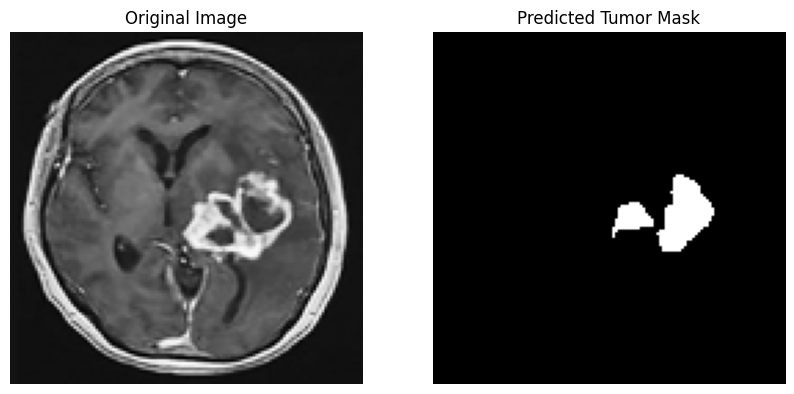

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = load_model("ns_highlighting_model.h5")

def preprocess_image(image):
    img_array = image / 255.0
    return np.expand_dims(img_array, axis=0)

def predict_tumor_mask(image):
    img = preprocess_image(image)

    predicted_mask = model.predict(img)

    threshold = 0.9
    binary_mask = (predicted_mask > threshold).astype(np.uint8)

    binary_mask = np.squeeze(binary_mask, axis=-1)

    return binary_mask

from PIL import Image

def load_image_and_predict_tumor_mask(image_path):
    image = Image.open(image_path).convert('L')
    image = image.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
    image_array = img_to_array(image)

    tumor_mask = predict_tumor_mask(image_array)

    tumor_mask = np.squeeze(tumor_mask, axis=0)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(tumor_mask, cmap='gray')
    plt.title("Predicted Tumor Mask")
    plt.axis('off')

    plt.show()

image_path = "image(8).jpg"
load_image_and_predict_tumor_mask(image_path)
